# Gespeichertes Modell zur Auswertung neuer Zeichen nutzen



In [1]:
import numpy as np
from tensorflow.keras import models

In [10]:
 # helper to load data from PNG image files
import imageio  
# glob helps select multiple files using patterns
import glob      

def load_own_dataset():
    # our own image test data set
    our_own_images = []
    our_own_labels = []

    # load the png image data as test data set
    for image_file_name in glob.glob('my_own_images/2828_my_*.png'):
        # use the filename to set the correct label
        label = int(image_file_name[-5:-4])
        # load image data from png files into an array
#        print ("loading ... ", image_file_name)
        img_array = imageio.imread(image_file_name, as_gray=True)
        # invert values
        img_data  = 255.0 - img_array 
        # append label and image data  to test data set
        our_own_images.append(img_data)
        our_own_labels.append(label)
    return  np.array(our_own_images), np.array(our_own_labels)


In [20]:
newX,newY = load_own_dataset()
print(newY)
#print(newX.shape)
#print(newX[4])

[2 3 4 5 6 7 8 9 1 2 3 4 5 6 7 3 4 3 3 6]


C:\Users\Bl\AppData\Local\Temp\ipykernel_14980\1315062330.py:17: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_array = imageio.imread(image_file_name, as_gray=True)


In [17]:
# Modell rekonstruieren
model = models.load_model("my_model")

In [21]:
# Making predictions using our trained model
predictions = model.predict(newX)
#print(np.shape(predictions))
#print(predictions)
predictions = np.argmax(predictions, axis=1)
#print(np.shape(predictions))
print(predictions)

1/1 [==============================] - 0s 23ms/step
[2 3 4 5 8 2 8 1 7 2 3 4 3 6 1 3 9 3 3 8]


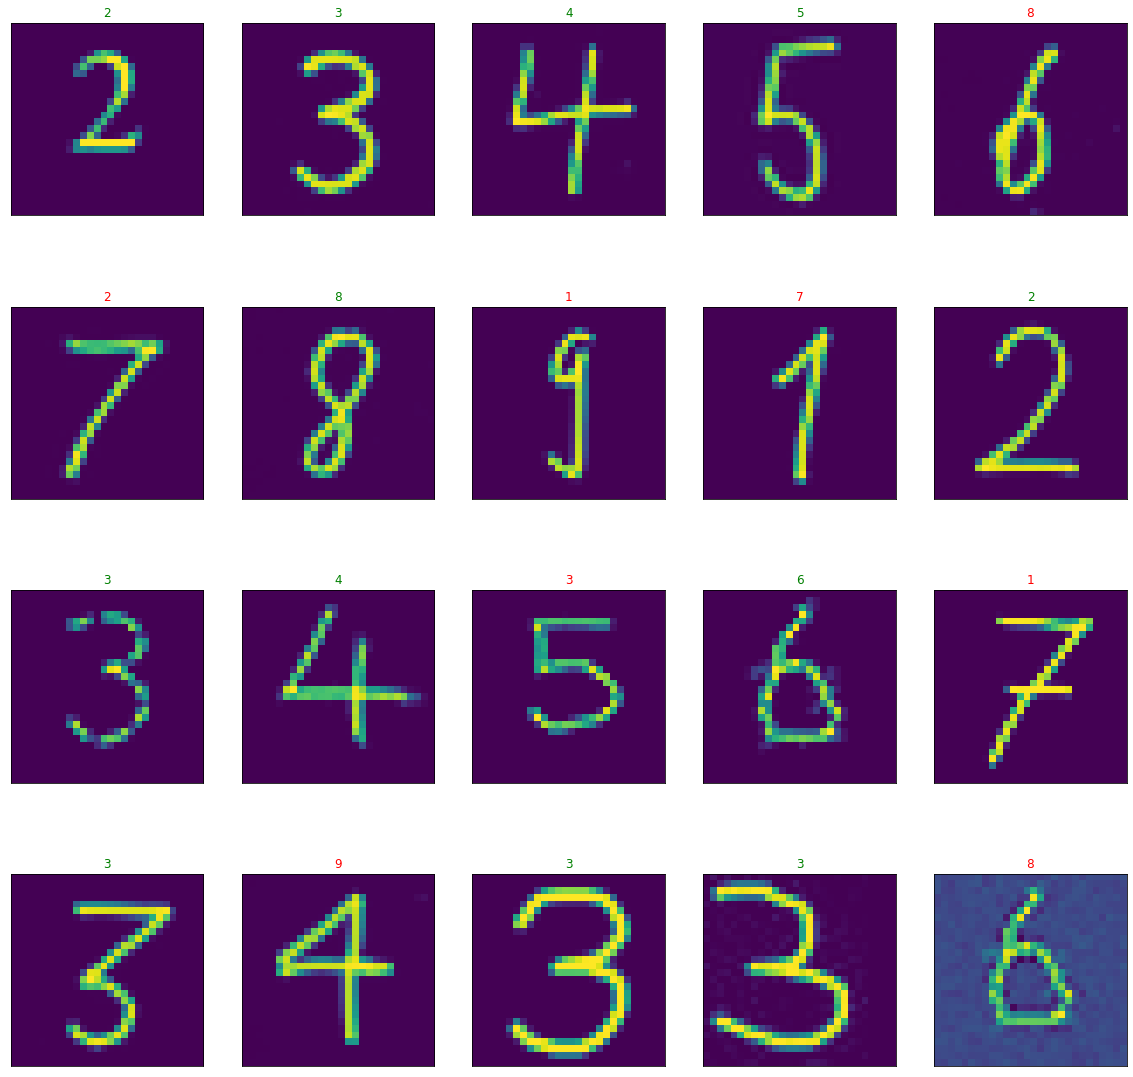

In [22]:
from matplotlib import pyplot as plt
# Display some predictions on test data
cols=5
rows=4
fig, axes = plt.subplots(ncols=cols,nrows=rows, sharex=False,sharey=True, figsize=(20, 20))
for i in range(len(predictions)):
    if predictions[i] == newY[i]:
        axes[i//cols][i%cols].set_title(predictions[i],color="green")
    else:
        axes[i//cols][i%cols].set_title(predictions[i],color="red")
    axes[i//cols][i%cols].imshow(newX[i],cmap="viridis") #, cmap='gray' https://matplotlib.org/stable/tutorials/colors/colormaps.html
    axes[i//cols][i%cols].get_xaxis().set_visible(False)
    axes[i//cols][i%cols].get_yaxis().set_visible(False)
plt.show()